<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/Datenanalyse_Test_Salome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown

# Die Datei-ID aus dem Google Drive-Link
file_id = '1VB_9wbmdneUo32XGGDNULnUZje4HsX8Q'
destination = '/content/deine_datei.csv'

# Datei herunterladen
gdown.download(f'https://drive.google.com/uc?id={file_id}', destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1VB_9wbmdneUo32XGGDNULnUZje4HsX8Q
From (redirected): https://drive.google.com/uc?id=1VB_9wbmdneUo32XGGDNULnUZje4HsX8Q&confirm=t&uuid=1c2d3241-9986-43da-ae13-828154bfd8f0
To: /content/deine_datei.csv
100%|██████████| 1.90G/1.90G [00:24<00:00, 77.6MB/s]


'/content/deine_datei.csv'

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
# Lade die heruntergeladene CSV-Datei
df = pd.read_csv('/content/deine_datei.csv')

# Zeige die ersten paar Zeilen der Datei an
print(df.head(10))

   LINIEN_TEXT            HALTESTELLEN_NAME         ABFAHRTSZEIT  \
0           10           Zürich, Salersteig  2024-01-01 04:36:00   
1           10         Zürich, Berninaplatz  2024-01-01 04:37:00   
2           10  Zürich, Hirschwiesenstrasse  2024-01-01 04:38:00   
3           10            Zürich, Milchbuck  2024-01-01 04:40:00   
4           10   Zürich, Universität Irchel  2024-01-01 04:41:00   
5           10     Zürich, Langmauerstrasse  2024-01-01 04:42:00   
6           10         Zürich, Letzistrasse  2024-01-01 04:43:00   
7           10     Zürich, Sternen Oerlikon  2024-01-01 04:44:00   
8           10        Zürich, Kinkelstrasse  2024-01-01 04:44:00   
9           10   Zürich, Seilbahn Rigiblick  2024-01-01 04:45:00   

           AB_PROGNOSE AB_PROGNOSE_STATUS  VERSPAETUNG [s] STATION  \
0  2024-01-01 04:37:09               REAL             69.0  NABZUE   
1  2024-01-01 04:38:08               REAL             68.0  NABZUE   
2  2024-01-01 04:39:12               REAL

In [ ]:
# Anzeigen der ersten 5 Zeilen des DataFrames
display(df.head(5))

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],STATION,BOEENSPITZE_[kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,TEMPERATUR_GLATT,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.396090,8.545105


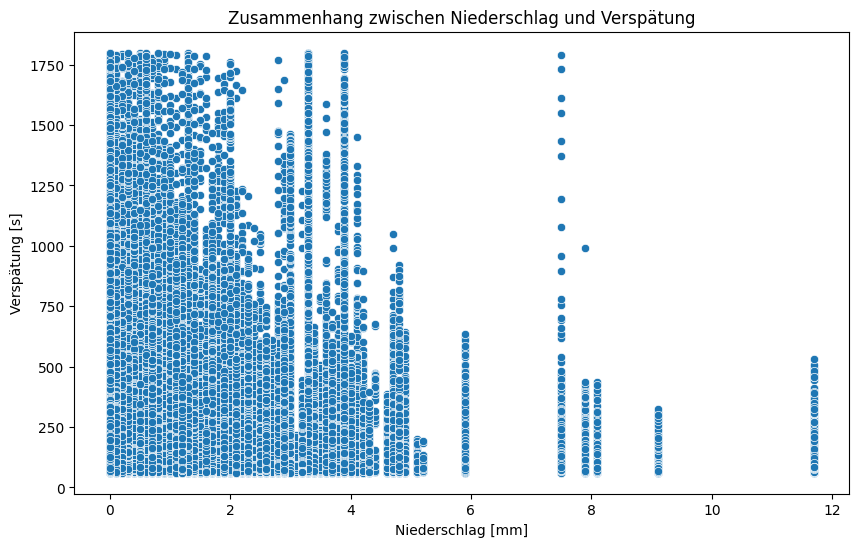

In [ ]:
# Erstelle das Streudiagramm
plt.figure(figsize=(10,6))  # Optional: Bildgröße anpassen
sns.scatterplot(data=df, x='NIEDERSCHLAG [mm]', y='VERSPAETUNG [s]')

# Achsenbeschriftungen hinzufügen
plt.title('Zusammenhang zwischen Niederschlag und Verspätung')
plt.xlabel('Niederschlag [mm]')
plt.ylabel('Verspätung [s]')

# Zeige die Grafik an
plt.show()

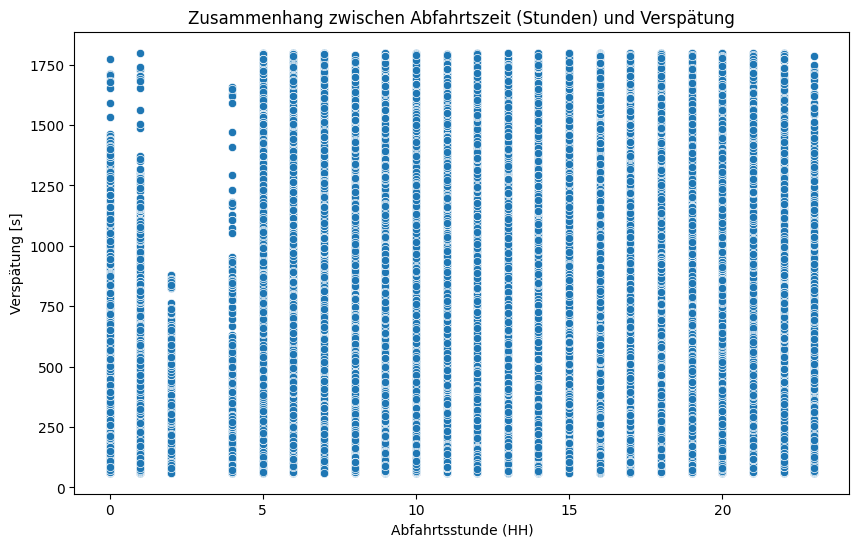

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere die Stunde und die Minute der Abfahrtszeit
df['Abfahrtsstunde'] = df['ABFAHRTSZEIT'].dt.hour
df['Abfahrtsminute'] = df['ABFAHRTSZEIT'].dt.minute

# Erstelle das Streudiagramm, das die Abfahrtsstunde auf der x-Achse und die Verspätung auf der y-Achse zeigt
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Abfahrtsstunde', y='VERSPAETUNG [s]')

# Achsenbeschriftungen hinzufügen
plt.title('Zusammenhang zwischen Abfahrtszeit (Stunden) und Verspätung')
plt.xlabel('Abfahrtsstunde (HH)')
plt.ylabel('Verspätung [s]')

# Zeige die Grafik an
plt.show()

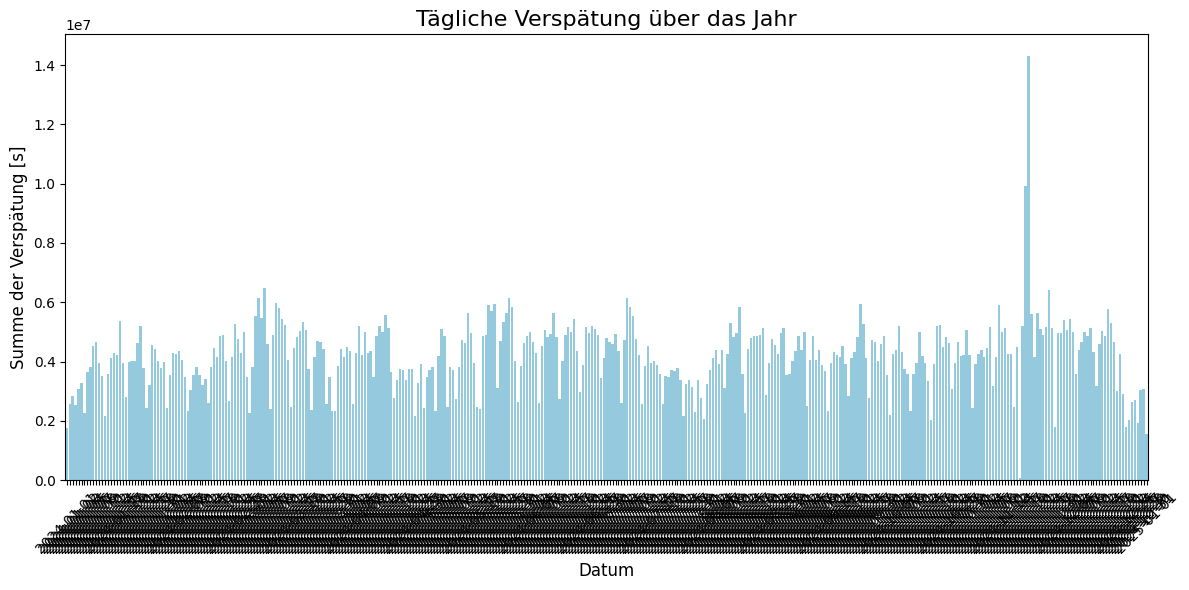

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere nur das Datum aus der Abfahrtszeit (ohne Uhrzeit)
df['Abfahrtsdatum'] = df['ABFAHRTSZEIT'].dt.date

# Gruppiere nach dem Datum und berechne die Summe der Verspätung pro Tag
daily_delays = df.groupby('Abfahrtsdatum')['VERSPAETUNG [s]'].sum()

# Erstelle eine Säulengrafik, die die Verspätung pro Tag zeigt
plt.figure(figsize=(12,6))
sns.barplot(x=daily_delays.index, y=daily_delays.values, color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Tägliche Verspätung über das Jahr', fontsize=16)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Summe der Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=45)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

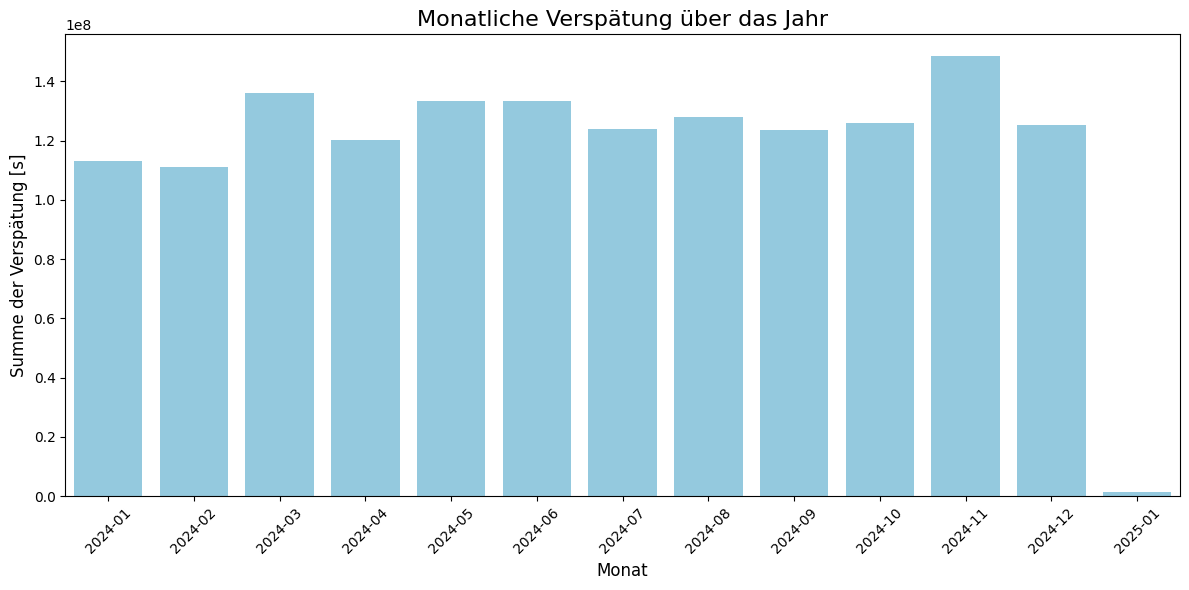

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere Jahr und Monat aus der Abfahrtszeit
df['Abfahrtsmonat'] = df['ABFAHRTSZEIT'].dt.to_period('M')

# Gruppiere nach Monat und Jahr und berechne die Summe der Verspätung pro Monat
monthly_delays = df.groupby('Abfahrtsmonat')['VERSPAETUNG [s]'].sum()

# Erstelle eine Säulengrafik für monatliche Verspätung
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_delays.index.astype(str), y=monthly_delays.values, color='skyblue')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Monatliche Verspätung über das Jahr', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Summe der Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=45)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

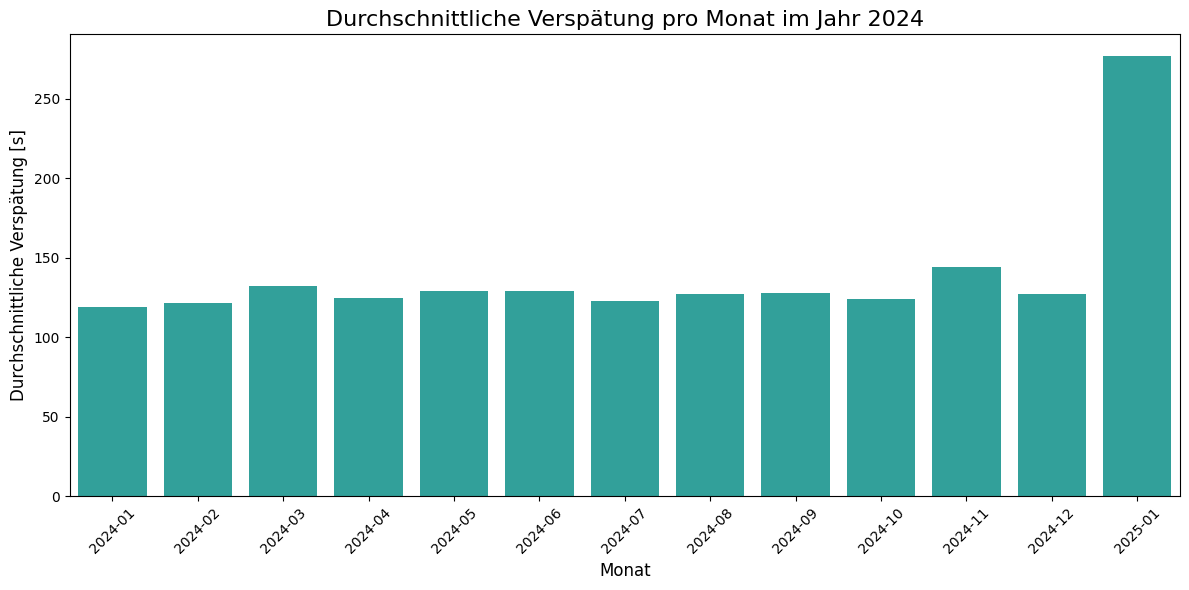

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere Jahr und Monat aus der Abfahrtszeit
df['Abfahrtsmonat'] = df['ABFAHRTSZEIT'].dt.to_period('M')  # Monat und Jahr als Perioden

# Gruppiere nach Monat und Jahr und berechne die durchschnittliche Verspätung pro Monat
monthly_delays_avg = df.groupby('Abfahrtsmonat')['VERSPAETUNG [s]'].mean()

# Erstelle eine Säulengrafik für die durchschnittliche Verspätung pro Monat
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_delays_avg.index.astype(str), y=monthly_delays_avg.values, color='lightseagreen')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Verspätung pro Monat im Jahr 2024', fontsize=16)
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=45)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

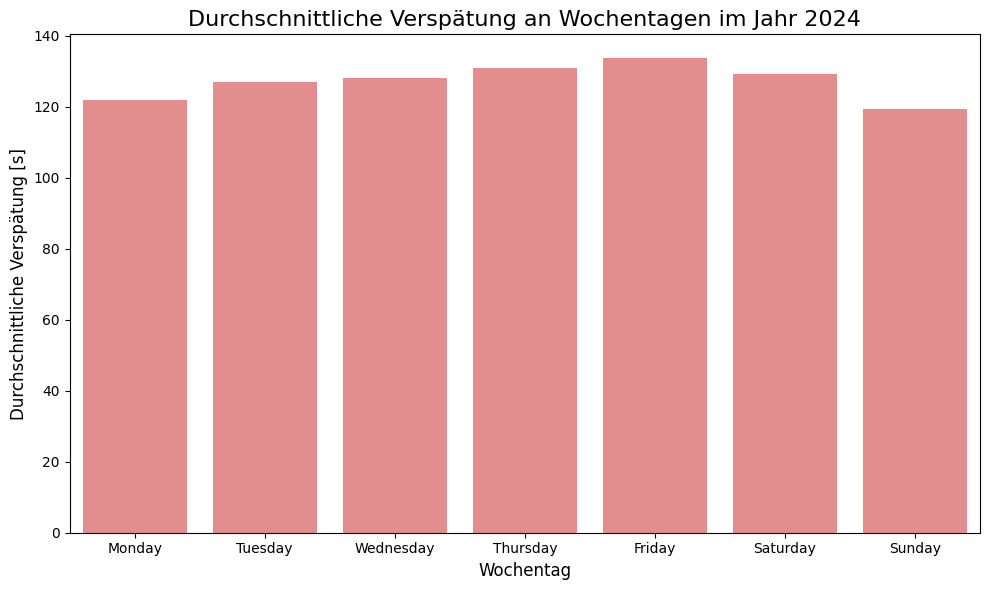

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Extrahiere den Wochentag als String (Montag, Dienstag, ...)
df['Wochentag'] = df['ABFAHRTSZEIT'].dt.strftime('%A')  # %A gibt den vollständigen Wochentagsnamen zurück

# Gruppiere nach Wochentag und berechne die durchschnittliche Verspätung pro Wochentag
weekday_delays_avg = df.groupby('Wochentag')['VERSPAETUNG [s]'].mean()

# Sortiere die Wochentage gemäß der Reihenfolge von Montag bis Sonntag
wochentage_sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_delays_avg = weekday_delays_avg[wochentage_sort]

# Erstelle eine Säulengrafik für die durchschnittliche Verspätung an Wochentagen
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_delays_avg.index, y=weekday_delays_avg.values, color='lightcoral')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Verspätung an Wochentagen im Jahr 2024', fontsize=16)
plt.xlabel('Wochentag', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

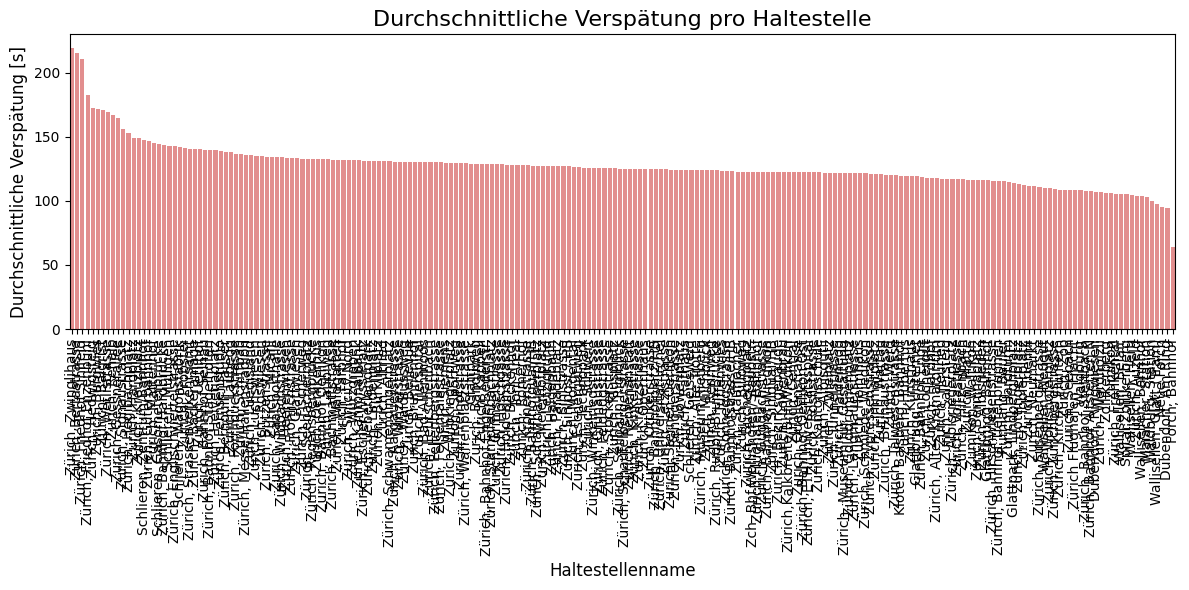

In [ ]:
# Gruppiere nach Haltestellen und berechne die durchschnittliche Verspätung pro Haltestelle
halt_delays_avg = df.groupby('HALTESTELLEN_NAME')['VERSPAETUNG [s]'].mean().sort_values(ascending=False)

# Erstelle eine Säulengrafik für die durchschnittliche Verspätung pro Haltestelle
plt.figure(figsize=(12,6))
sns.barplot(x=halt_delays_avg.index, y=halt_delays_avg.values, color='lightcoral')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Verspätung pro Haltestelle', fontsize=16)
plt.xlabel('Haltestellenname', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=90)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

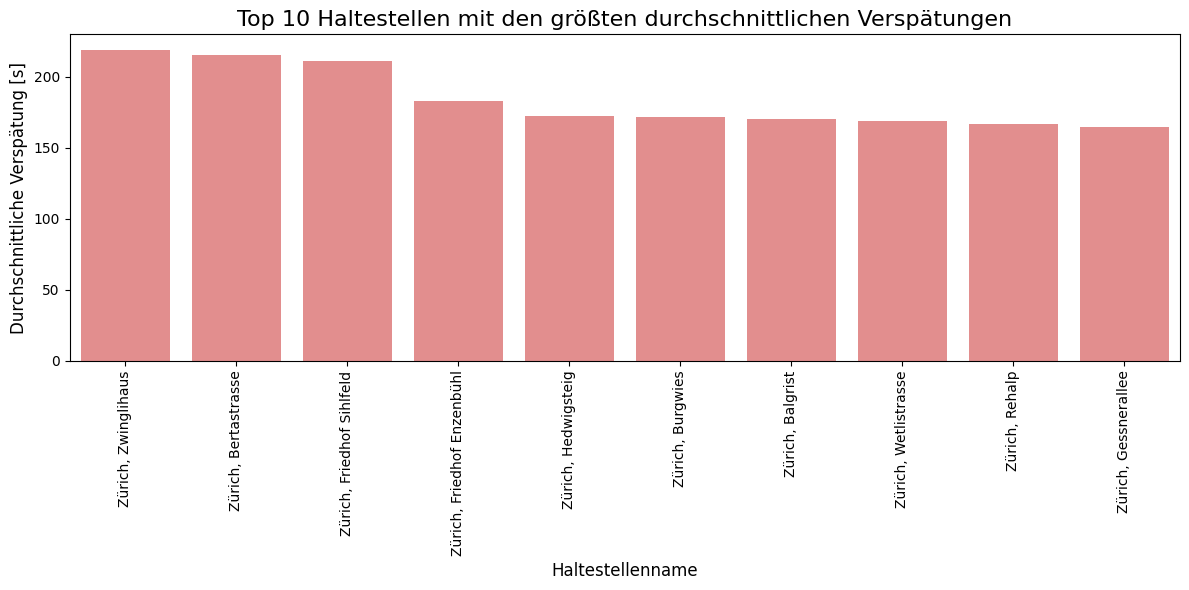

In [ ]:
# Gruppiere nach Haltestellen und berechne die durchschnittliche Verspätung pro Haltestelle
halt_delays_avg = df.groupby('HALTESTELLEN_NAME')['VERSPAETUNG [s]'].mean()

# Zeige nur die 10 Haltestellen mit der größten durchschnittlichen Verspätung
halt_delays_top10 = halt_delays_avg.nlargest(10)

# Erstelle eine Säulengrafik für die 10 Haltestellen mit den größten durchschnittlichen Verspätungen
plt.figure(figsize=(12,6))
sns.barplot(x=halt_delays_top10.index, y=halt_delays_top10.values, color='lightcoral')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Top 10 Haltestellen mit den größten durchschnittlichen Verspätungen', fontsize=16)
plt.xlabel('Haltestellenname', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Drehe die X-Achsen-Beschriftungen, um sie besser lesbar zu machen
plt.xticks(rotation=90)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

<ipython-input-23-279488a03262>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day


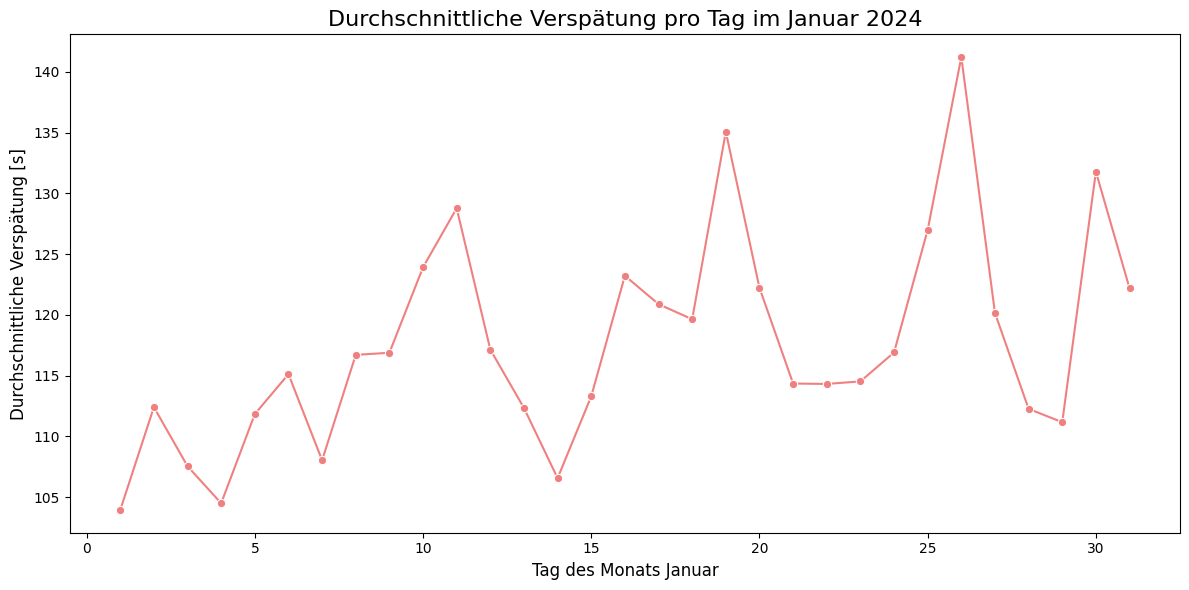

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Filtern der Daten für Januar 2024
df_januar = df[df['ABFAHRTSZEIT'].dt.month == 1]
df_januar = df_januar[df_januar['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung pro Tag
daily_delays_avg = df_januar.groupby('Tag')['VERSPAETUNG [s]'].mean()

# Erstelle eine Linie/Grafik für die durchschnittliche Verspätung pro Tag im Januar
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_delays_avg.index, y=daily_delays_avg.values, marker='o', color='lightcoral')

# Achsenbeschriftungen und Titel hinzufügen
plt.title('Durchschnittliche Verspätung pro Tag im Januar 2024', fontsize=16)
plt.xlabel('Tag des Monats Januar', fontsize=12)
plt.ylabel('Durchschnittliche Verspätung [s]', fontsize=12)

# Zeige die Grafik an
plt.tight_layout()
plt.show()

<ipython-input-24-893da9ee54cf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day


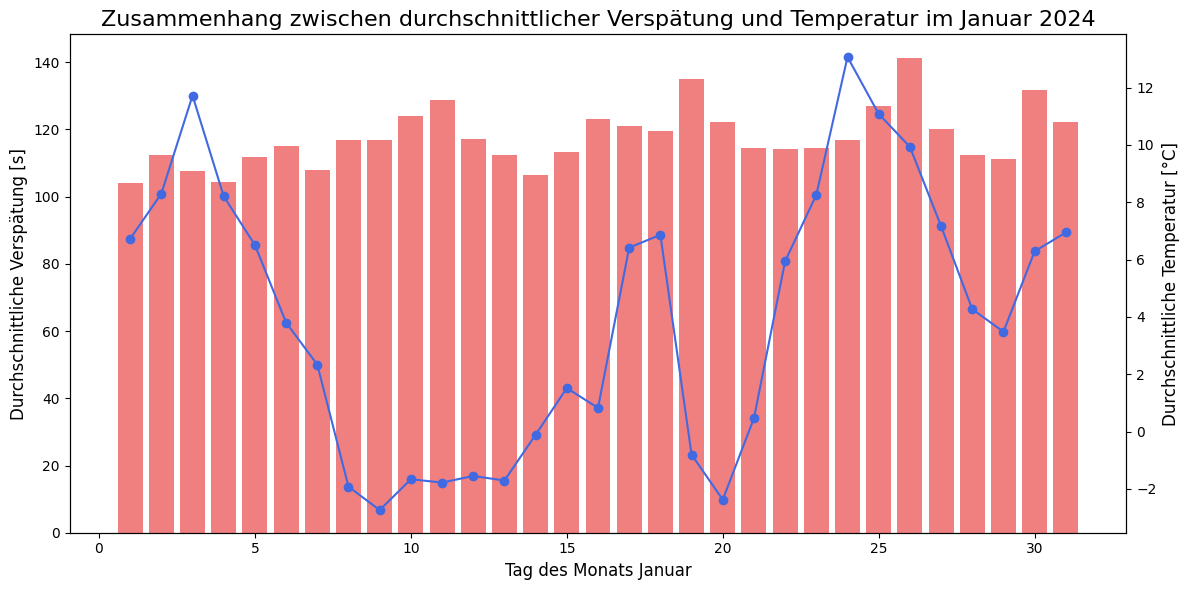

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Filtern der Daten für Januar 2024
df_januar = df[df['ABFAHRTSZEIT'].dt.month == 1]
df_januar = df_januar[df_januar['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Temperatur pro Tag
daily_delays_avg = df_januar.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_temp_avg = df_januar.groupby('Tag')['TEMPERATUR [°C]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats Januar', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Temperatur im Januar 2024', fontsize=16)

# Zweite Y-Achse für die Temperatur
ax2 = ax1.twinx()
ax2.plot(daily_temp_avg.index, daily_temp_avg.values, color='royalblue', marker='o', label='Durchschnittliche Temperatur [°C]')
ax2.set_ylabel('Durchschnittliche Temperatur [°C]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

<ipython-input-25-9a302f30249c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day


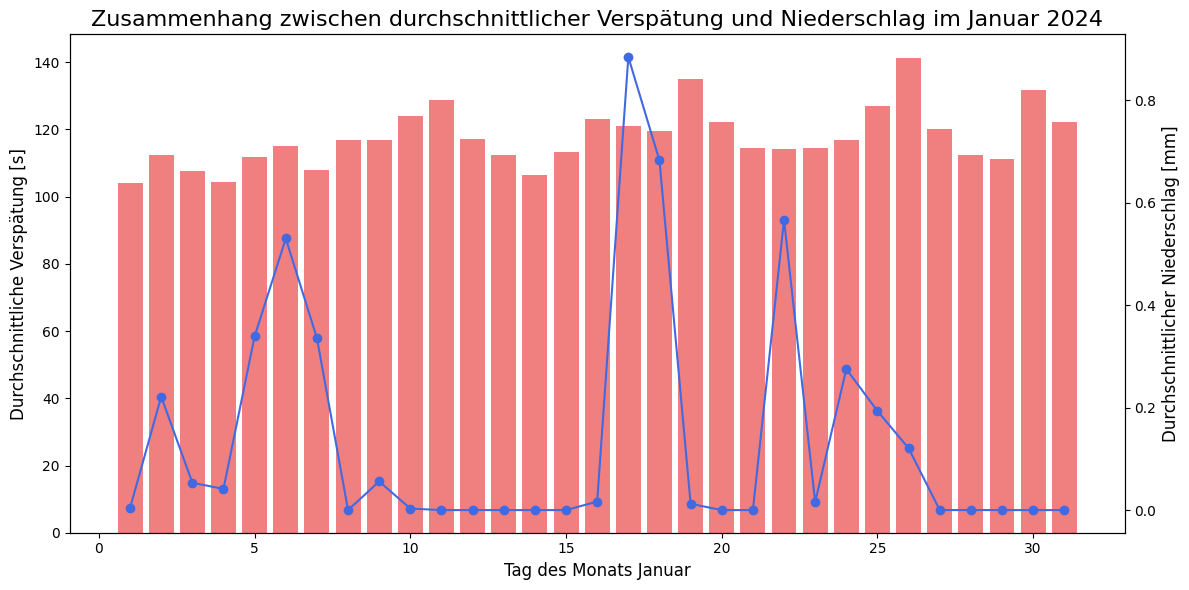

In [ ]:
# Wandelt "ABFAHRTSZEIT" in das datetime-Format um
df['ABFAHRTSZEIT'] = pd.to_datetime(df['ABFAHRTSZEIT'])

# Filtern der Daten für Januar 2024
df_januar = df[df['ABFAHRTSZEIT'].dt.month == 1]
df_januar = df_januar[df_januar['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_januar['Tag'] = df_januar['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_januar.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_januar.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()  # Anpassung hier

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats Januar', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im Januar 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

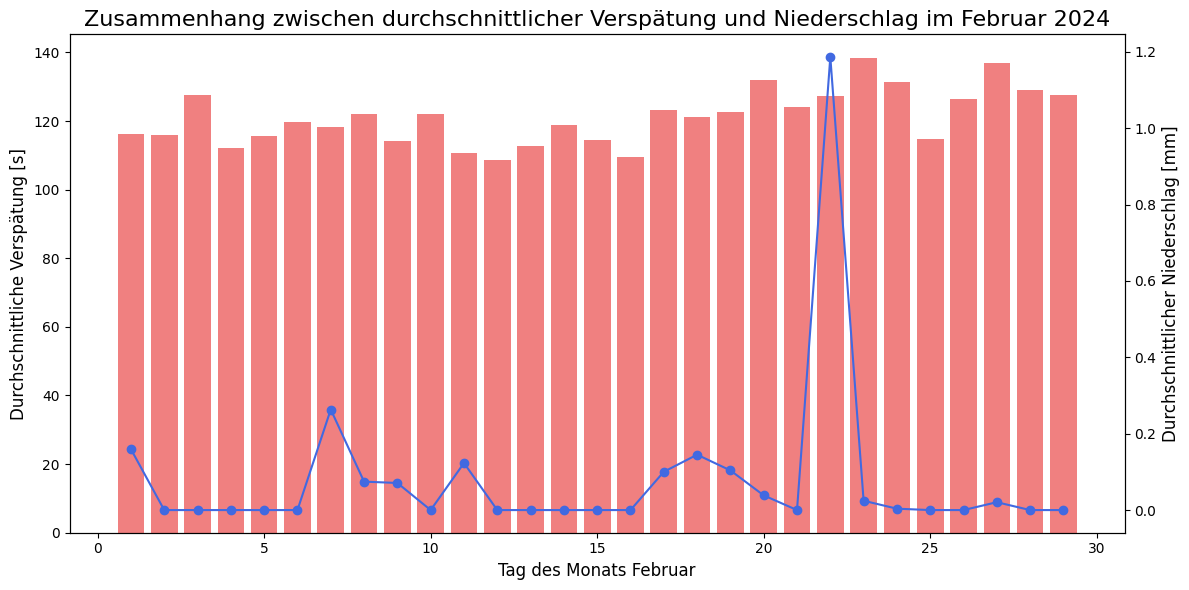

In [ ]:
# Filtern der Daten für Februar 2024
df_februar = df[df['ABFAHRTSZEIT'].dt.month == 2]
df_februar = df_februar[df_februar['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_februar['Tag'] = df_februar['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_februar.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_februar.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats Februar', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im Februar 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

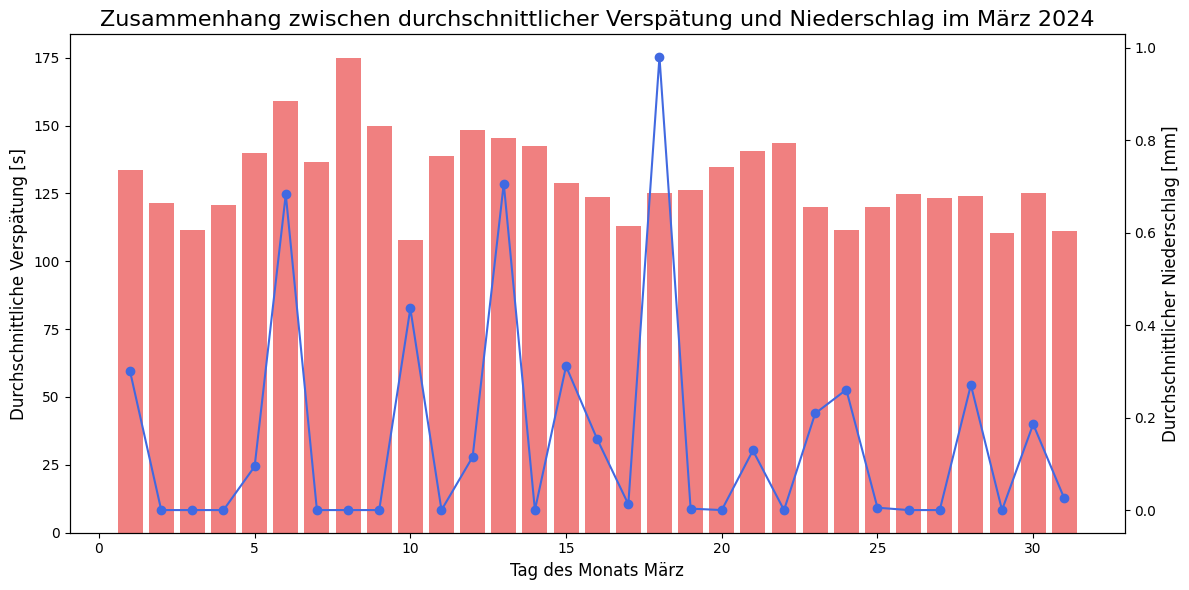

In [ ]:
# Filtern der Daten für März 2024
df_maerz = df[df['ABFAHRTSZEIT'].dt.month == 3]
df_maerz = df_maerz[df_maerz['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_maerz['Tag'] = df_maerz['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_maerz.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_maerz.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats März', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im März 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

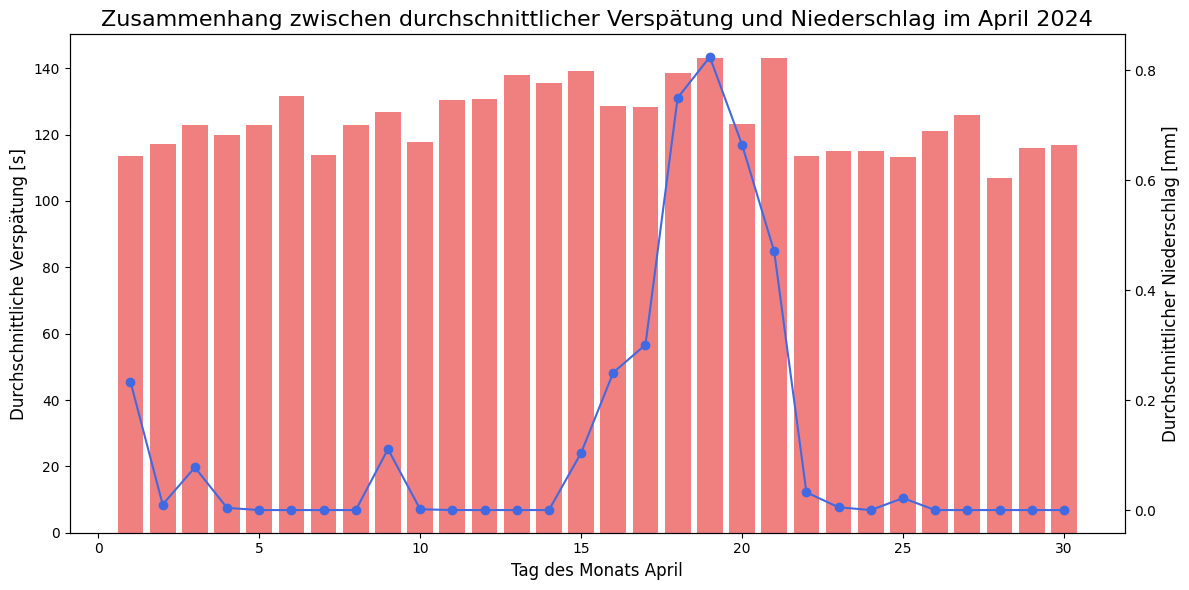

In [ ]:
# Filtern der Daten für April 2024
df_april = df[df['ABFAHRTSZEIT'].dt.month == 4]
df_april = df_april[df_april['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_april['Tag'] = df_april['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_april.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_april.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats April', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im April 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

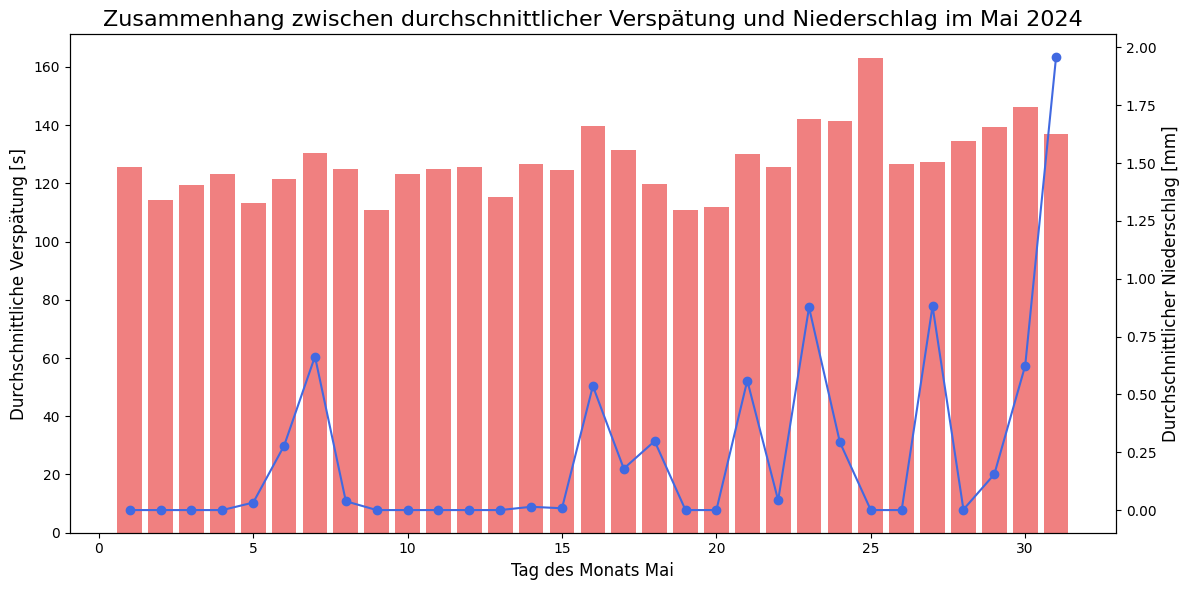

In [ ]:
# Filtern der Daten für Mai 2024
df_mai = df[df['ABFAHRTSZEIT'].dt.month == 5]
df_mai = df_mai[df_mai['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_mai['Tag'] = df_mai['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_mai.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_mai.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats Mai', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im Mai 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

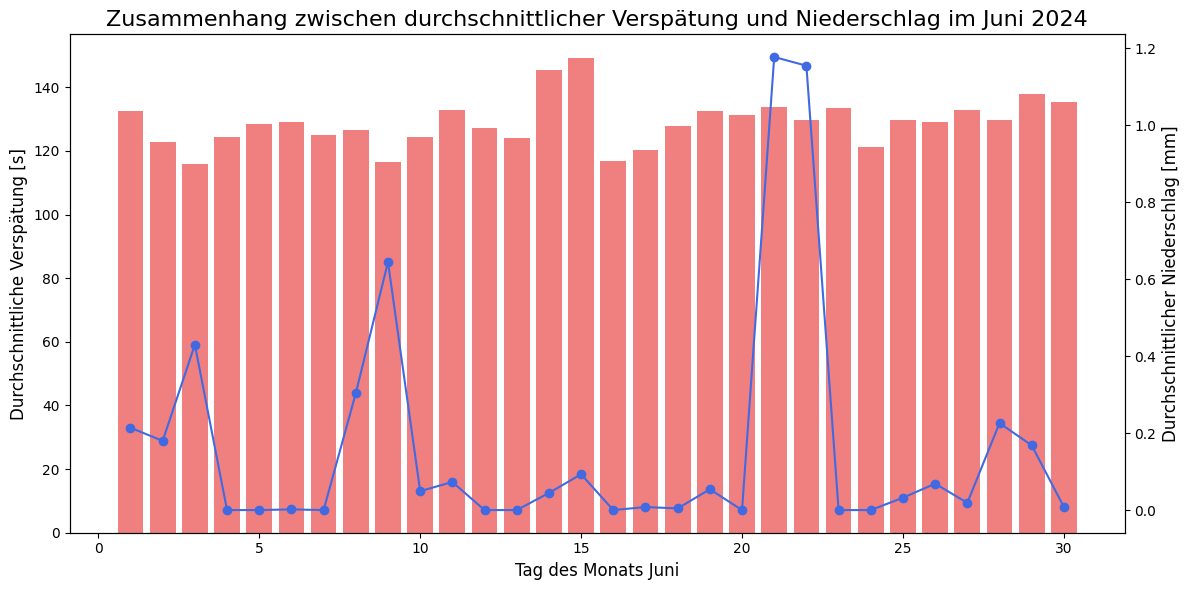

In [ ]:
# Filtern der Daten für Juni 2024
df_juni = df[df['ABFAHRTSZEIT'].dt.month == 6]
df_juni = df_juni[df_juni['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_juni['Tag'] = df_juni['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_juni.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_juni.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats Juni', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im Juni 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

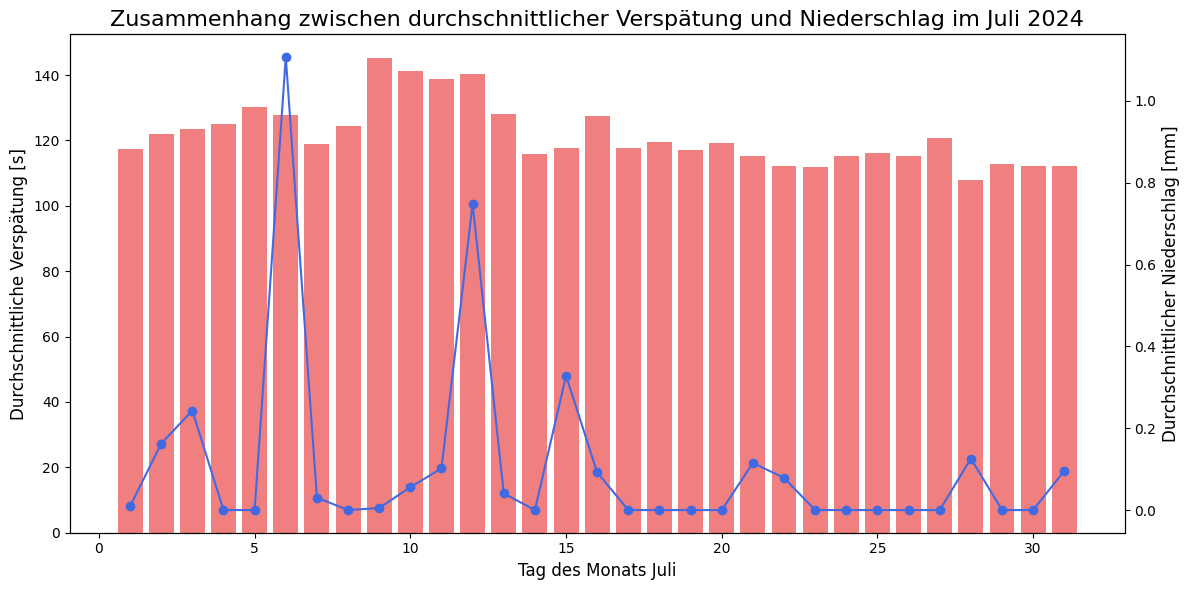

In [ ]:
# Filtern der Daten für Juli 2024
df_juli = df[df['ABFAHRTSZEIT'].dt.month == 7]
df_juli = df_juli[df_juli['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_juli['Tag'] = df_juli['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_juli.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_juli.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats Juli', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im Juli 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

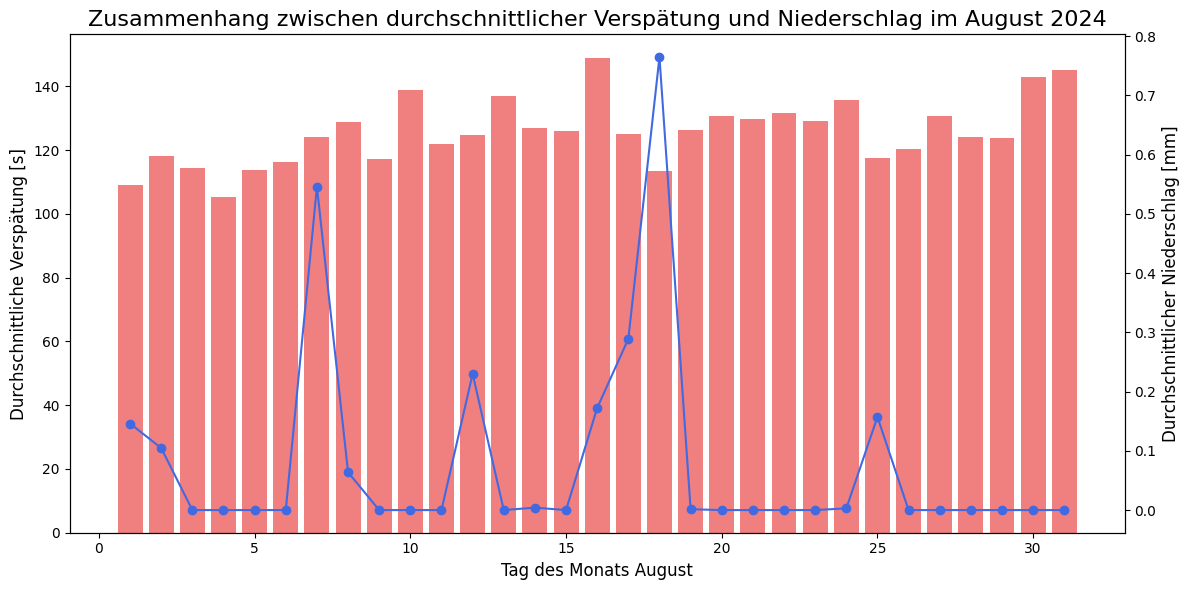

In [ ]:
# Filtern der Daten für August 2024
df_august = df[df['ABFAHRTSZEIT'].dt.month == 8]
df_august = df_august[df_august['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_august['Tag'] = df_august['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_august.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_august.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats August', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im August 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

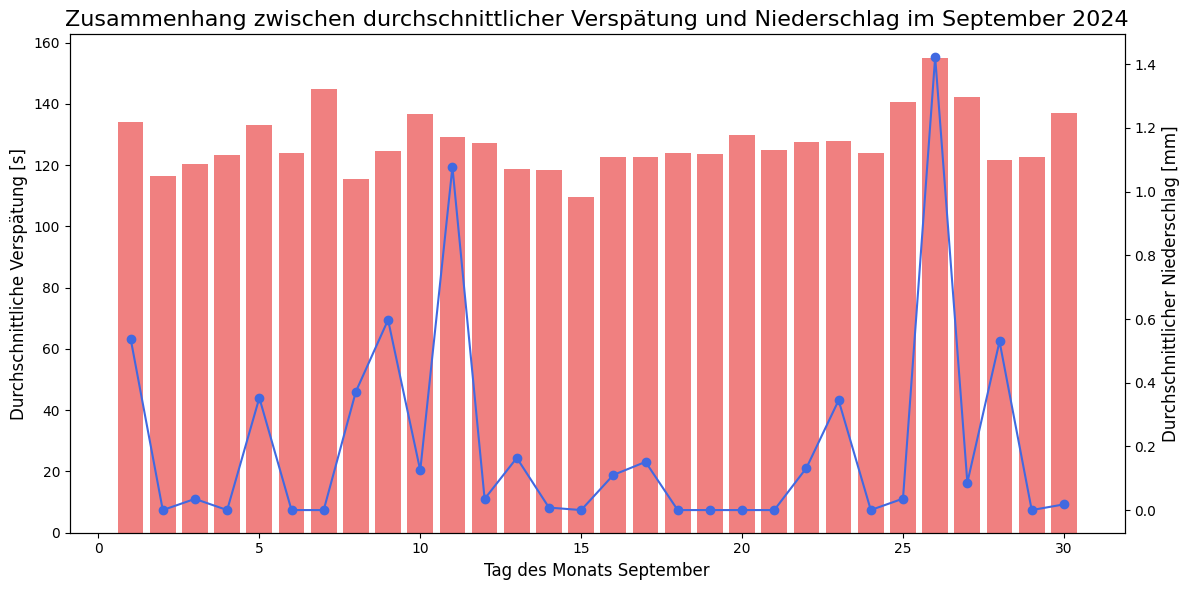

In [ ]:
# Filtern der Daten für September 2024
df_september = df[df['ABFAHRTSZEIT'].dt.month == 9]
df_september = df_september[df_september['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_september['Tag'] = df_september['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_september.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_september.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats September', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im September 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

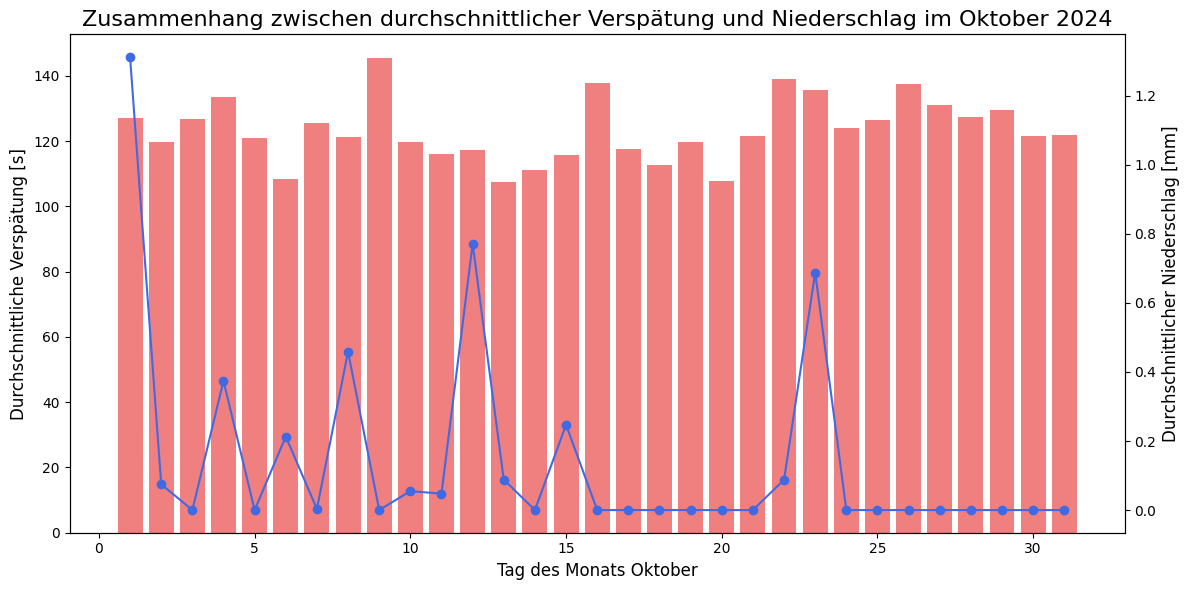

In [ ]:
# Filtern der Daten für Oktober 2024
df_oktober = df[df['ABFAHRTSZEIT'].dt.month == 10]
df_oktober = df_oktober[df_oktober['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_oktober['Tag'] = df_oktober['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_oktober.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_oktober.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats Oktober', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im Oktober 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

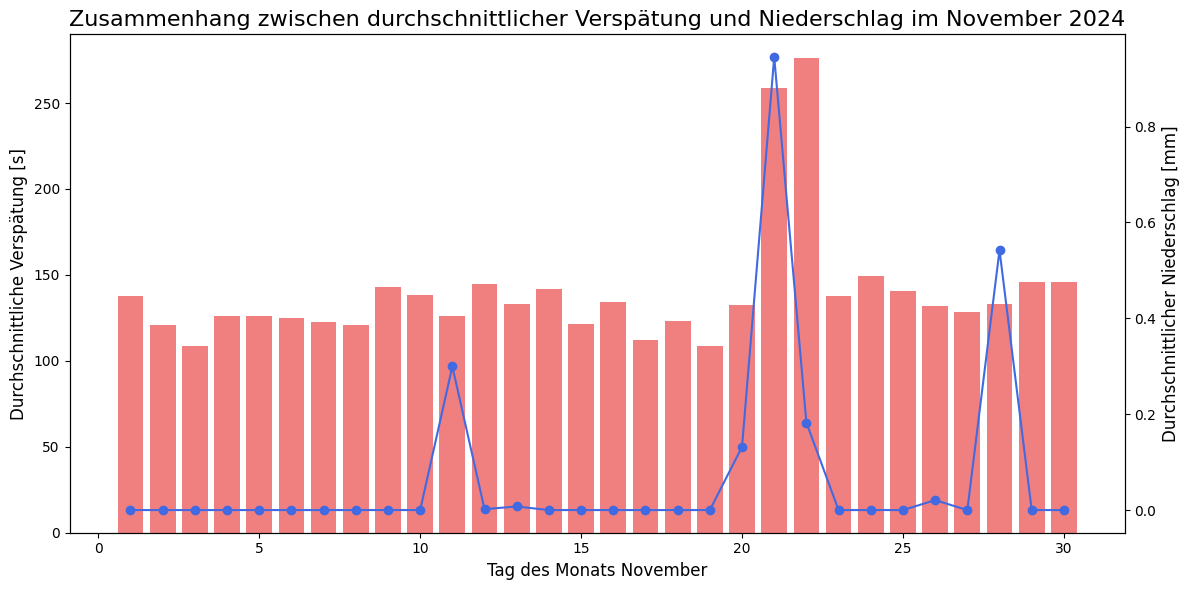

In [ ]:
# Filtern der Daten für November 2024
df_november = df[df['ABFAHRTSZEIT'].dt.month == 11]
df_november = df_november[df_november['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_november['Tag'] = df_november['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_november.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_november.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats November', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im November 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

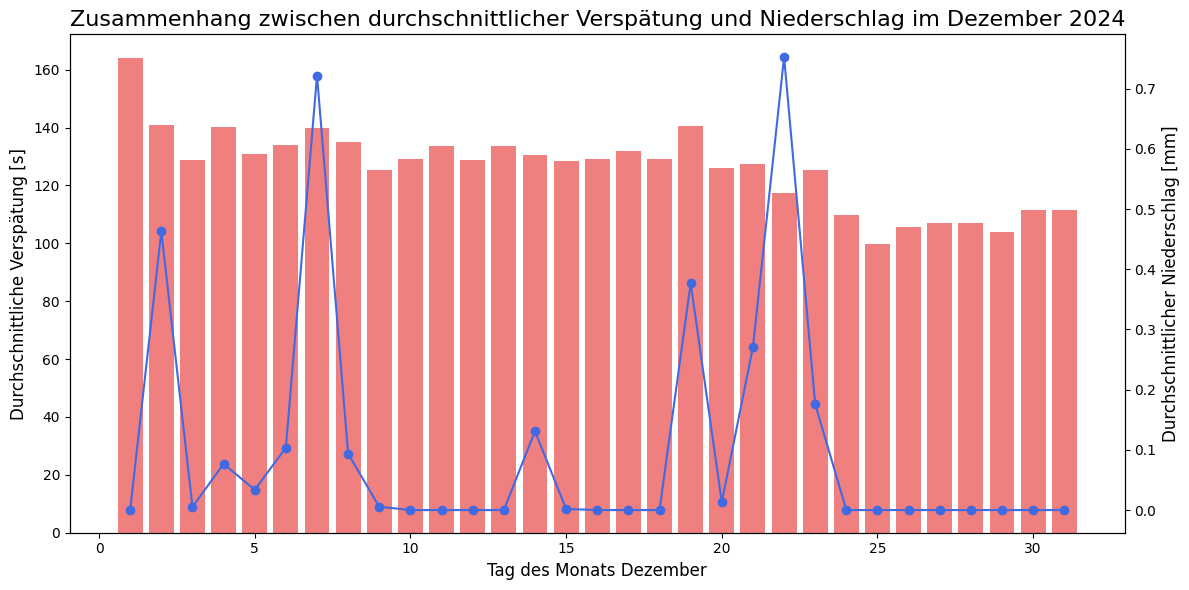

In [ ]:
# Filtern der Daten für Dezember 2024
df_dezember = df[df['ABFAHRTSZEIT'].dt.month == 12]
df_dezember = df_dezember[df_dezember['ABFAHRTSZEIT'].dt.year == 2024]

# Extrahiere den Tag des Monats aus der Abfahrtszeit
df_dezember['Tag'] = df_dezember['ABFAHRTSZEIT'].dt.day

# Gruppiere nach Tag und berechne die durchschnittliche Verspätung und Niederschlag pro Tag
daily_delays_avg = df_dezember.groupby('Tag')['VERSPAETUNG [s]'].mean()
daily_precip_avg = df_dezember.groupby('Tag')['NIEDERSCHLAG [mm]'].mean()

# Erstelle das Diagramm
fig, ax1 = plt.subplots(figsize=(12,6))

# Säulendiagramm für die durchschnittliche Verspätung
ax1.bar(daily_delays_avg.index, daily_delays_avg.values, color='lightcoral', label='Durchschnittliche Verspätung [s]')
ax1.set_xlabel('Tag des Monats Dezember', fontsize=12)
ax1.set_ylabel('Durchschnittliche Verspätung [s]', fontsize=12)
ax1.set_title('Zusammenhang zwischen durchschnittlicher Verspätung und Niederschlag im Dezember 2024', fontsize=16)

# Zweite Y-Achse für den Niederschlag
ax2 = ax1.twinx()
ax2.plot(daily_precip_avg.index, daily_precip_avg.values, color='royalblue', marker='o', label='Durchschnittlicher Niederschlag [mm]')
ax2.set_ylabel('Durchschnittlicher Niederschlag [mm]', fontsize=12)

# Zeige das Diagramm
plt.tight_layout()
plt.show()

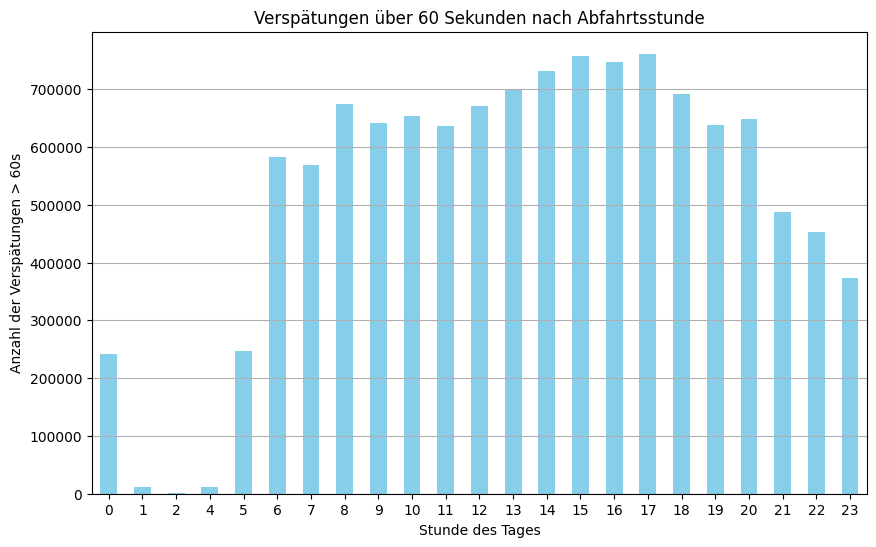

In [ ]:
# Verspätungen über 60 Sekunden filtern
df_filtered = df[df['VERSPAETUNG [s]'] > 60]

# Stunde aus der Abfahrtszeit extrahieren
df_filtered['ABFAHRTSZEIT_STUNDE'] = df_filtered['ABFAHRTSZEIT'].dt.hour

# Anzahl der Verspätungen pro Stunde zählen
verspaetung_pro_stunde = df_filtered['ABFAHRTSZEIT_STUNDE'].value_counts().sort_index()

# Plotten
plt.figure(figsize=(10, 6))
verspaetung_pro_stunde.plot(kind='bar', color='skyblue')
plt.title('Verspätungen über 60 Sekunden nach Abfahrtsstunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Verspätungen > 60s')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

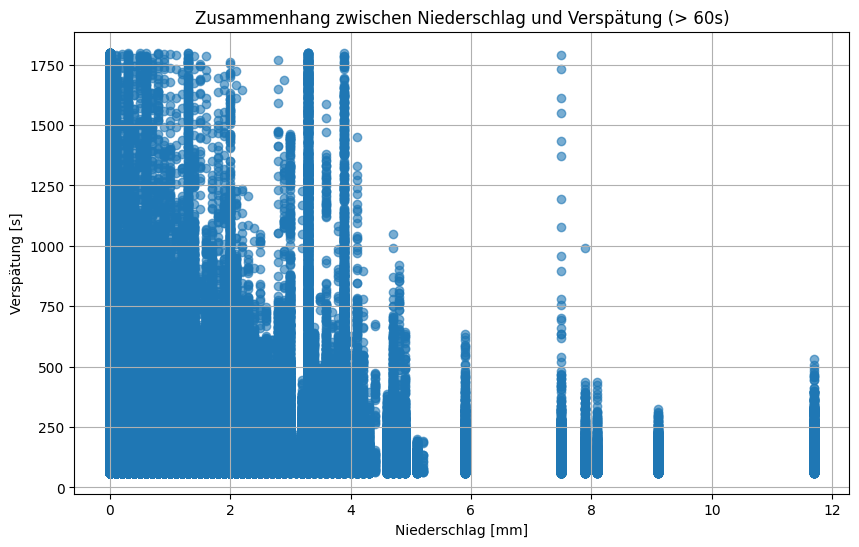

Korrelation zwischen Verspätung und Niederschlag: 0.04


In [ ]:
# Filter: nur Verspätungen über 60 Sekunden
df_filtered = df[df['VERSPAETUNG [s]'] > 60]

# Optional: Datum extrahieren (falls du das einzeln sehen willst)
df_filtered['DATUM'] = df_filtered['ABFAHRTSZEIT'].dt.date

# Streudiagramm: NIEDERSCHLAG [mm] vs VERSPAETUNG [s]
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['NIEDERSCHLAG [mm]'], df_filtered['VERSPAETUNG [s]'], alpha=0.6)
plt.title('Zusammenhang zwischen Niederschlag und Verspätung (> 60s)')
plt.xlabel('Niederschlag [mm]')
plt.ylabel('Verspätung [s]')
plt.grid(True)
plt.show()

# Optionale Korrelation berechnen
korrelation = df_filtered[['VERSPAETUNG [s]', 'NIEDERSCHLAG [mm]']].corr().iloc[0, 1]
print(f"Korrelation zwischen Verspätung und Niederschlag: {korrelation:.2f}")

<ipython-input-14-b8af19d9f1cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DATUM'] = df_filtered['ABFAHRTSZEIT'].dt.date


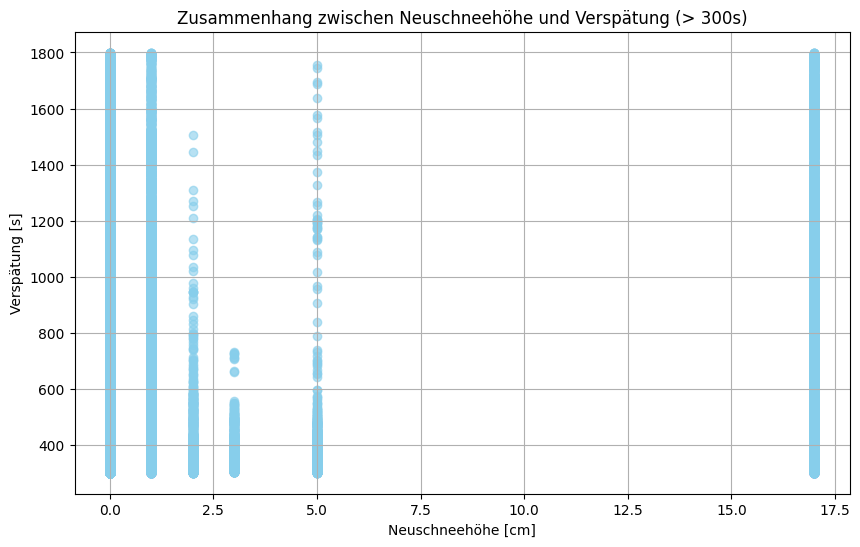

Korrelation zwischen Verspätung und Neuschneehöhe: 0.19


In [ ]:
# Filter: nur Verspätungen über 300 Sekunden
df_filtered = df[df['VERSPAETUNG [s]'] > 300]

# Optional: Datum extrahieren
df_filtered['DATUM'] = df_filtered['ABFAHRTSZEIT'].dt.date

# Scatterplot: NEUSCHNEEHOEHE vs VERSPAETUNG
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['NEUSCHNEEHOEHE [cm]'], df_filtered['VERSPAETUNG [s]'], alpha=0.6, color='skyblue')
plt.title('Zusammenhang zwischen Neuschneehöhe und Verspätung (> 300s)')
plt.xlabel('Neuschneehöhe [cm]')
plt.ylabel('Verspätung [s]')
plt.grid(True)
plt.show()

# Korrelation berechnen
korrelation = df_filtered[['VERSPAETUNG [s]', 'NEUSCHNEEHOEHE [cm]']].corr().iloc[0, 1]
print(f"Korrelation zwischen Verspätung und Neuschneehöhe: {korrelation:.2f}")

<ipython-input-20-c3fe618c9115>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TAG_IM_JANUAR'] = df_filtered['ABFAHRTSZEIT'].dt.day
<ipython-input-20-c3fe618c9115>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['WETTER_INFO'] = (
<ipython-input-20-c3fe618c9115>:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


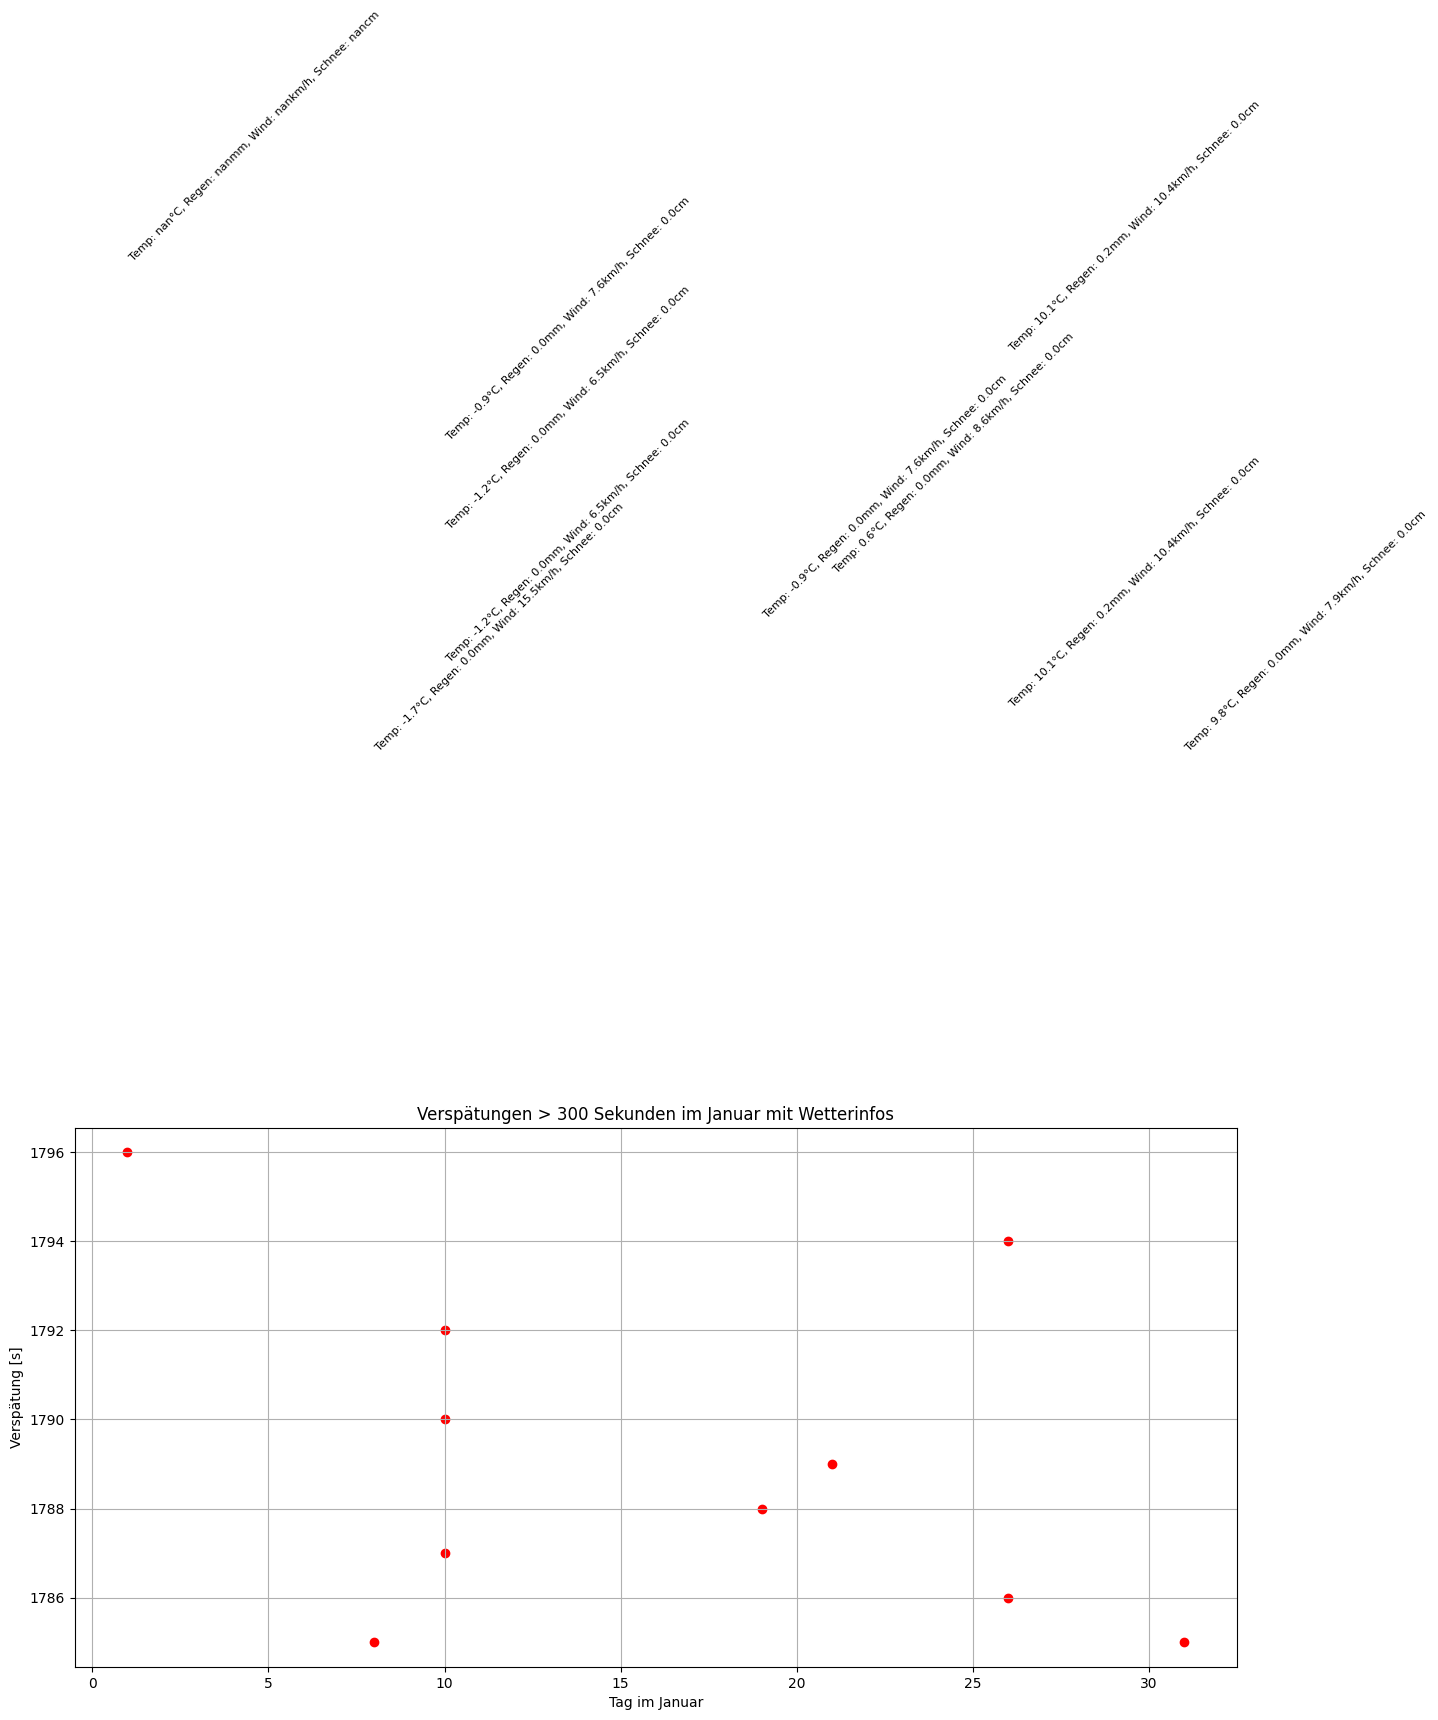

In [ ]:
# Verspätungen > 1780 s & Januar filtern
df_filtered = df[
    (df['VERSPAETUNG [s]'] > 1780) &
    (df['ABFAHRTSZEIT'].dt.month == 1)
]

# Extrahiere Tag im Januar (für X-Achse)
df_filtered['TAG_IM_JANUAR'] = df_filtered['ABFAHRTSZEIT'].dt.day

# Wetter-Infos als Text zusammenfassen
df_filtered['WETTER_INFO'] = (
    'Temp: ' + df_filtered['TEMPERATUR [°C]'].astype(str) + '°C, ' +
    'Regen: ' + df_filtered['NIEDERSCHLAG [mm]'].astype(str) + 'mm, ' +
    'Wind: ' + df_filtered['WINDGESCHWINDIGKEIT [kmh]'].astype(str) + 'km/h, ' +
    'Schnee: ' + df_filtered['NEUSCHNEEHOEHE [cm]'].astype(str) + 'cm'
)

# Plot vorbereiten
plt.figure(figsize=(15, 7))
plt.scatter(df_filtered['TAG_IM_JANUAR'], df_filtered['VERSPAETUNG [s]'], color='red')

# Texte zum Plot hinzufügen
for i, row in df_filtered.iterrows():
    plt.text(
        row['TAG_IM_JANUAR'],
        row['VERSPAETUNG [s]'] + 20,  # etwas über dem Punkt
        row['WETTER_INFO'],
        fontsize=8,
        rotation=45
    )

# Achsenbeschriftungen & Titel
plt.xlabel('Tag im Januar')
plt.ylabel('Verspätung [s]')
plt.title('Verspätungen > 300 Sekunden im Januar mit Wetterinfos')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
df = pd.read_csv('/content/Datensatz_komplett.csv')
df.head()

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],STATION,BOEENSPITZE_[kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,TEMPERATUR_GLATT,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,5.12,47.396090,8.545105


# Neuer Abschnitt